## Document Scanning using skimage 

Add util folder to the path

In [315]:
%load_ext autoreload 
%autoreload 2
import sys

sys.path.append("../util")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


import neccessary dependencies

In [316]:
from plot import plot_images
from skimage.io import imread
from skimage.transform import rescale
from skimage.morphology import closing
from skimage.feature import canny
from skimage.filters import gaussian
from skimage.color import rgb2gray
from skimage.transform import hough_line, hough_line_peaks
import matplotlib.pyplot as plt
import numpy as np

Read the image and scale it down to reduce computational expences

In [317]:
scaling_factor = .25
img_path = "../images/example_1.jpg"

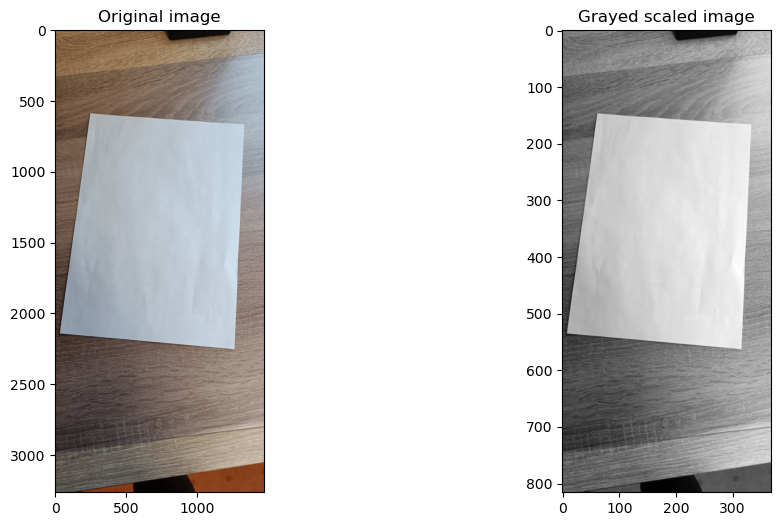

In [318]:
img = imread(img_path)
working_img = rescale(img, scaling_factor, channel_axis=2)
working_img = rgb2gray(working_img)

_ = plot_images([(img, "Original image"), (working_img, "Grayed scaled image", plt.cm.gray)], figsize=(12,6))

Use closing and gaussian blur as preprocessing steps to remove noise and thins like text

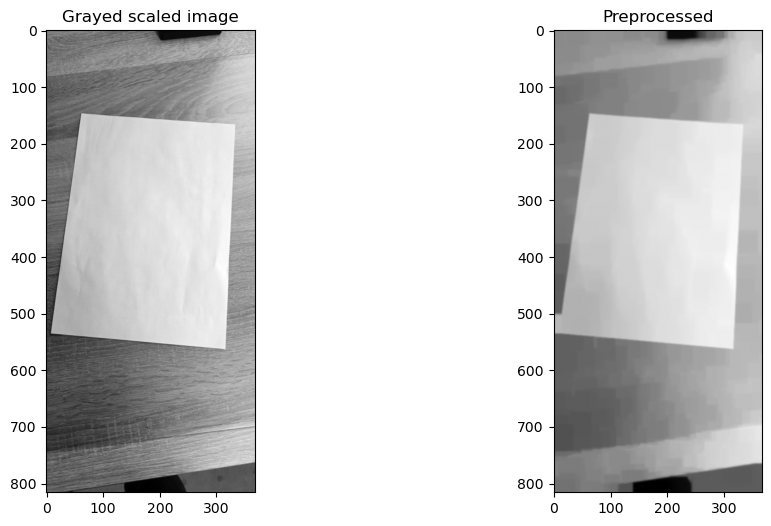

In [319]:
preprocess_img = closing(working_img, footprint=[(np.ones((27, 1)), 1), (np.ones((1, 27)), 1)])
preprocess_img = gaussian(preprocess_img, sigma=1.2)

_ = plot_images([(working_img, "Grayed scaled image", plt.cm.gray), (preprocess_img, "Preprocessed", plt.cm.gray)], figsize=(12,6))

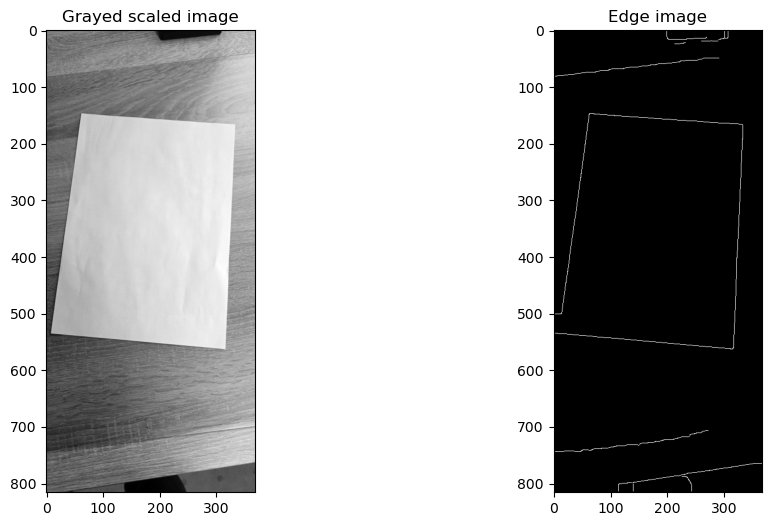

In [320]:
edge_image = canny(preprocess_img)

_ = plot_images([(working_img, "Grayed scaled image", plt.cm.gray), (edge_image, "Edge image", plt.cm.gray)], figsize=(12,6))

With the now final preprocessed image, use hough transform to find lines which would correspond to the edges of the document, in the image.

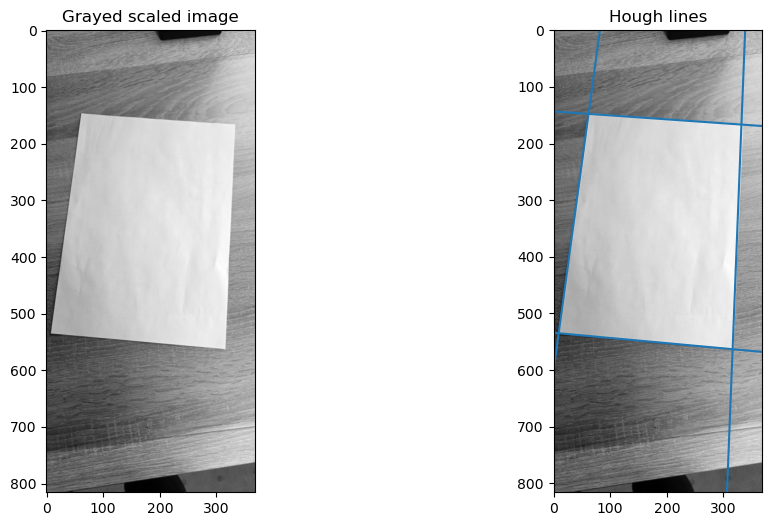

In [321]:
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 720, endpoint=False)
h, theta, d = hough_line(edge_image, theta=tested_angles)



fig, ax = plot_images([(working_img, "Grayed scaled image", plt.cm.gray), (working_img, "Hough lines", plt.cm.gray)], figsize=(12,6))

ax[1].set_xlim(0, working_img.shape[1])
ax[1].set_ylim(working_img.shape[0], 0)

for _, angle, dist in zip(*hough_line_peaks(h, theta, d, num_peaks=4, threshold=.4*max([max(a) for a in h]))):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[1].axline((x0, y0), slope=np.tan(angle + np.pi / 2))